In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import  numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [2]:
with_mask_folder = os.path.join(os.getcwd(),"../Data/dataset/with_mask")
without_mask_folder = os.path.join(os.getcwd(),"../Data/dataset/without_mask")

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,dsize=(128,128))
        if img is not None:
            images.append(img)
    return images

In [4]:
images_with_mask = load_images_from_folder(with_mask_folder)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [5]:
images_without_mask = load_images_from_folder(without_mask_folder)

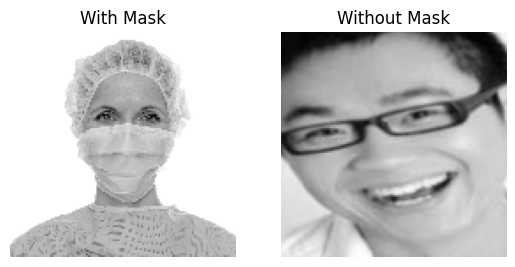

In [6]:
fig,[ax1,ax2] = plt.subplots(1,2)

ax1.axis("off")
ax1.set_title("With Mask")
ax1.imshow(images_with_mask[2],cmap="gray")

ax2.axis("off")
ax2.set_title("Without Mask")
ax2.imshow(images_without_mask[2],cmap="gray")

plt.show()

In [7]:
print(len(images_with_mask))
print(len(images_without_mask))

2165
1930


In [8]:
labels_with_mask = np.ones(len(images_with_mask))
labels_without_mask = np.zeros(len(images_without_mask))

In [9]:
X = np.concatenate((images_with_mask,images_without_mask),axis=0)
y = np.concatenate((labels_with_mask,labels_without_mask),axis=0)

In [10]:
X_normalized = [x/255.0 for x in X]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=56)

In [17]:
from skimage.feature import hog

X_train_hog_features = []
X_train_hog_images = []
for image in X_train:
    features, h_img = hog(image, pixels_per_cell=(8,8), cells_per_block=(2,2), visualize=True)
    X_train_hog_features.append(features)
    X_train_hog_images.append(h_img)


In [18]:
X_test_hog_features = []
X_test_hog_images = []
for image in X_test:
    features, h_img = hog(image, pixels_per_cell=(8,8), cells_per_block=(2,2), visualize=True)
    X_test_hog_features.append(features)
    X_test_hog_images.append(h_img)

In [19]:
X_train_hog_features = np.array(X_train_hog_features)
X_train_hog_images = np.array(X_train_hog_images)
X_test_hog_features = np.array(X_test_hog_features)
X_test_hog_images = np.array(X_test_hog_images)

In [20]:
print(X_train_hog_features.shape,y_train.shape)
print(X_test_hog_features.shape,y_test.shape)

(3276, 8100) (3276,)
(819, 8100) (819,)


In [21]:
def fit_and_predict(X_train,y_train,X_test,model):
    svc = SVC()
    svc.fit(X_train,y_train)
    y_pred = svc.predict(X_test)

    with open(model, "wb") as f:
        pickle.dump(svc, f)

    return y_pred

In [ ]:
y_pred_hog = fit_and_predict(X_train_hog_features,y_train,X_test_hog_features,"/home/aditya/VR_MiniProject/model/HOG_SVC.pkl")
y_pred_hog.shape

In [23]:
def show_evaluations(y_true,y_pred,feature_extraction):

    print(feature_extraction)
    print("-------------------------------")
    print(f"accuracy score : {accuracy_score(y_pred,y_true)}")
    print(f"confusion_matrix :\n {confusion_matrix(y_pred,y_true)}")
    print(f"classification_report: \n{classification_report(y_pred,y_true)}")

In [24]:
def plot_(X_test,y_pred,y_test):
    fig,axes = plt.subplots(5,5,figsize=(18,8))
    for i in range(5*5):
        r,c = i//5,i%5
        rand = np.random.randint(len(X_test))
        axes[r][c].axis("off")
        axes[r][c].set_title("correct prediction" if y_pred[rand]==y_test[rand] else "wrong prediction")
        axes[r][c].imshow(X_test[rand],cmap="gray")
    plt.show()

In [28]:
show_evaluations(y_test,y_pred_hog,"HOG")

HOG
-------------------------------
accuracy score : 0.9255189255189256
confusion_matrix :
 [[327  20]
 [ 41 431]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       347
         1.0       0.96      0.91      0.93       472

    accuracy                           0.93       819
   macro avg       0.92      0.93      0.92       819
weighted avg       0.93      0.93      0.93       819



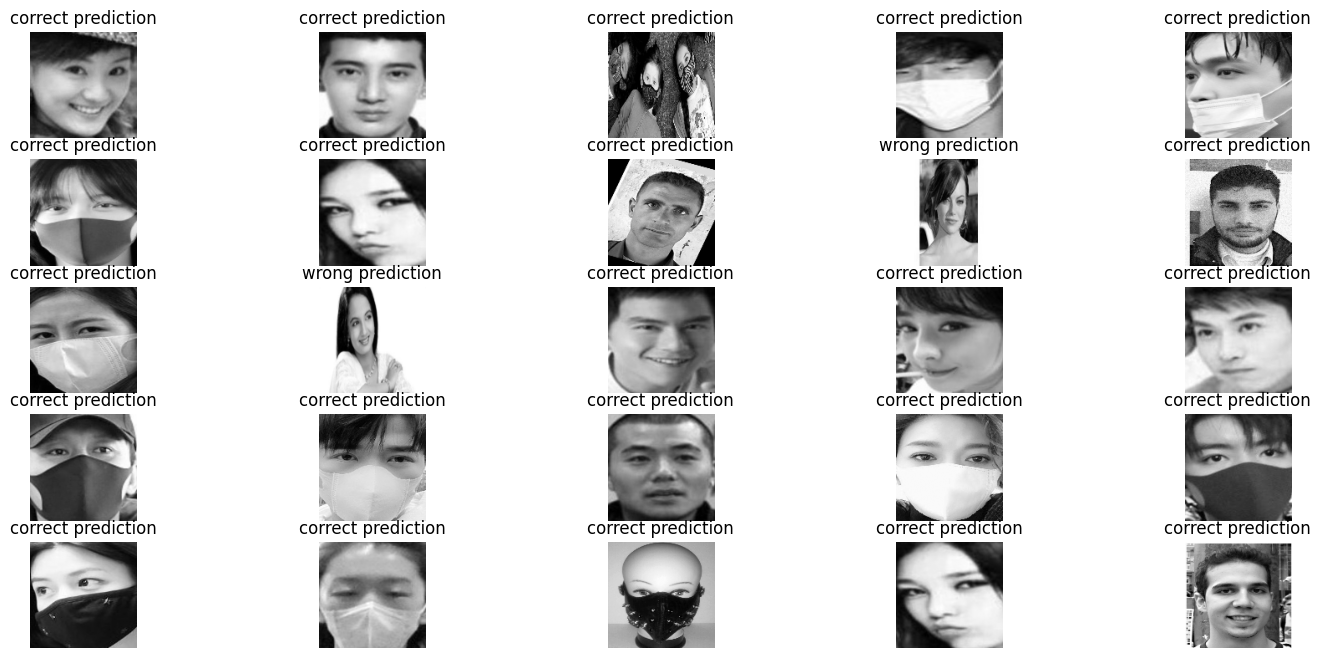

In [22]:
plot_(X_test,y_pred_hog,y_test)

In [12]:
from skimage.feature import local_binary_pattern

X_train_lbp_features = []
for image in X_train:
    features = local_binary_pattern(image,P=8, R=1, method="uniform").flatten()
    X_train_lbp_features.append(features)

In [13]:
X_test_lbp_features = []
for image in X_test:
    features = local_binary_pattern(image,P=8, R=1, method="uniform").flatten()
    X_test_lbp_features.append(features)

In [25]:
y_pred_lbp = fit_and_predict(X_train_lbp_features,y_train,X_test_lbp_features,"/home/aditya/VR_MiniProject/model/LBP_SVC.pkl")
y_pred_lbp.shape

(819,)

In [26]:
show_evaluations(y_test,y_pred_lbp,"LBP")

LBP
-------------------------------
accuracy score : 0.8534798534798534
confusion_matrix :
 [[295  47]
 [ 73 404]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       342
         1.0       0.90      0.85      0.87       477

    accuracy                           0.85       819
   macro avg       0.85      0.85      0.85       819
weighted avg       0.86      0.85      0.85       819



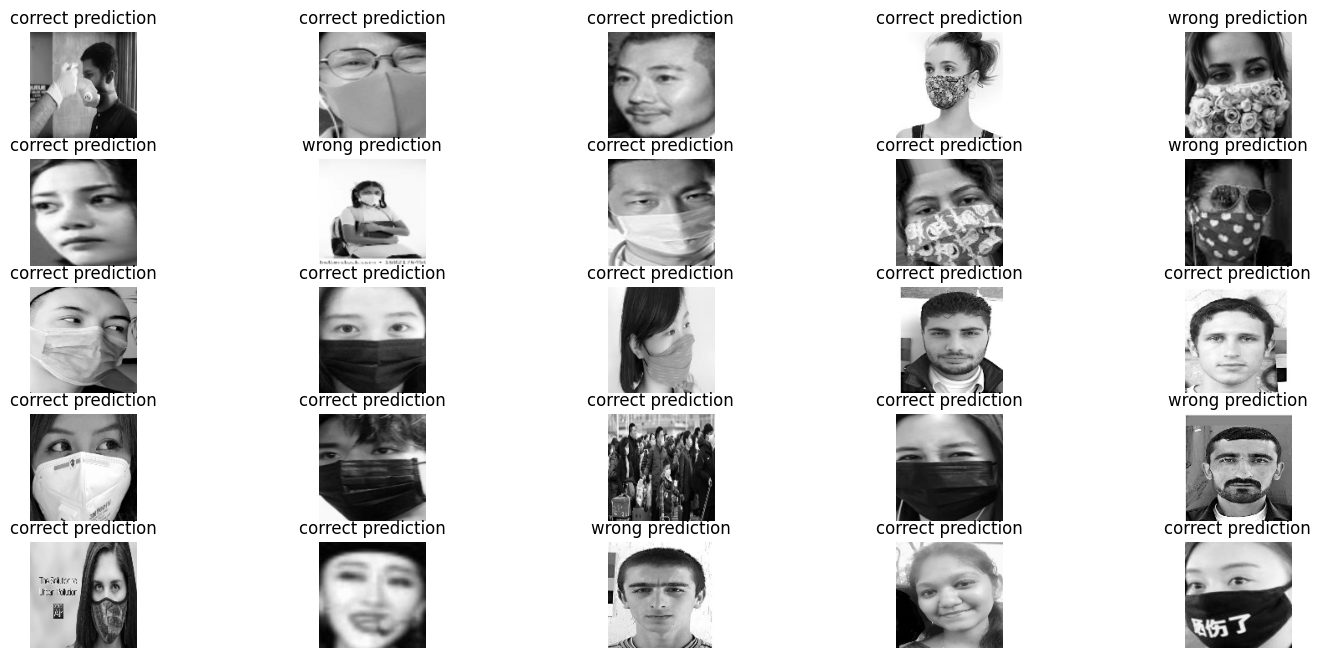

In [27]:
plot_(X_test,y_pred_lbp,y_test)

In [29]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,TensorDataset

In [30]:
class NueralNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=8100, out_features=128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.10)
        self.layer_2 = nn.Linear(in_features=128, out_features=64)
        self.layer_3 = nn.Linear(in_features=64, out_features= 1)

    def forward(self, x):
        x = self.layer_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.layer_2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.layer_3(x)
        return x

In [36]:
nnet = NueralNetwork()
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=nnet.parameters(), lr=0.01)

In [31]:
X_train_hog_features_tensor = torch.tensor(X_train_hog_features,dtype=torch.float32)
X_test_hog_features_tensor = torch.tensor(X_test_hog_features,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)
y_test  = torch.tensor(y_test,dtype=torch.float32)

In [32]:
print(y_train.shape)

torch.Size([3276])


In [33]:
print(X_test_hog_features_tensor.shape)

torch.Size([819, 8100])


In [ ]:
epochs = 101

for epoch in range(epochs):
    
    nnet.train()
    optimizer.zero_grad()

    y_logits = nnet(X_train_hog_features_tensor)
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits.squeeze(), y_train.float())
    acc = accuracy_score(y_pred.squeeze().detach().cpu().numpy(), y_train.cpu().numpy())

    loss.backward()
    optimizer.step()

    if epoch%5==0:
        nnet.eval()
        print(f"Epoch {epoch}", f"Loss: {loss.item()}", f"accuracy: {acc}")

        with torch.inference_mode():
            test_logits = nnet(X_test_hog_features_tensor).squeeze()
            test_pred = torch.round(torch.sigmoid(test_logits))
            test_loss = loss_fn(test_logits, y_test.float())
            test_acc = accuracy_score(test_pred, y_test)

            print(f"Epoch {epoch}", f"Test Loss: {test_loss.item()}", f"Test Accuracy: {test_acc}")


Epoch 0 Loss: 0.6923065185546875 accuracy: 0.5231990231990232
Epoch 0 Test Loss: 0.5230734944343567 Test Accuracy: 0.7643467643467643
Epoch 5 Loss: 1.7685744762420654 accuracy: 0.5231990231990232
Epoch 5 Test Loss: 1.0171966552734375 Test Accuracy: 0.5506715506715507
Epoch 10 Loss: 0.7808070182800293 accuracy: 0.49145299145299143
Epoch 10 Test Loss: 0.7219282388687134 Test Accuracy: 0.44932844932844934
Epoch 15 Loss: 0.6278820633888245 accuracy: 0.6929181929181929
Epoch 15 Test Loss: 0.6020693182945251 Test Accuracy: 0.8131868131868132
Epoch 20 Loss: 0.5322007536888123 accuracy: 0.73992673992674
Epoch 20 Test Loss: 0.4664713442325592 Test Accuracy: 0.8168498168498168
Epoch 25 Loss: 0.4425880014896393 accuracy: 0.7918192918192918
Epoch 25 Test Loss: 0.40320757031440735 Test Accuracy: 0.8278388278388278
Epoch 30 Loss: 0.36846432089805603 accuracy: 0.8382173382173382
Epoch 30 Test Loss: 0.3600963056087494 Test Accuracy: 0.8461538461538461
Epoch 35 Loss: 0.31049224734306335 accuracy: 0.865

In [34]:
X_test_hog_features_tensor.shape

torch.Size([819, 8100])

In [50]:
nnet.eval()
with torch.inference_mode():
    y_pred_nn = nnet(X_test_hog_features_tensor)
    y_pred_nn = torch.round(torch.sigmoid(y_pred_nn))

In [51]:
show_evaluations(y_test,y_pred_nn,"Nueral Network")

Nueral Network
-------------------------------
accuracy score : 0.905982905982906
confusion_matrix :
 [[324  33]
 [ 44 418]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89       357
         1.0       0.93      0.90      0.92       462

    accuracy                           0.91       819
   macro avg       0.90      0.91      0.90       819
weighted avg       0.91      0.91      0.91       819



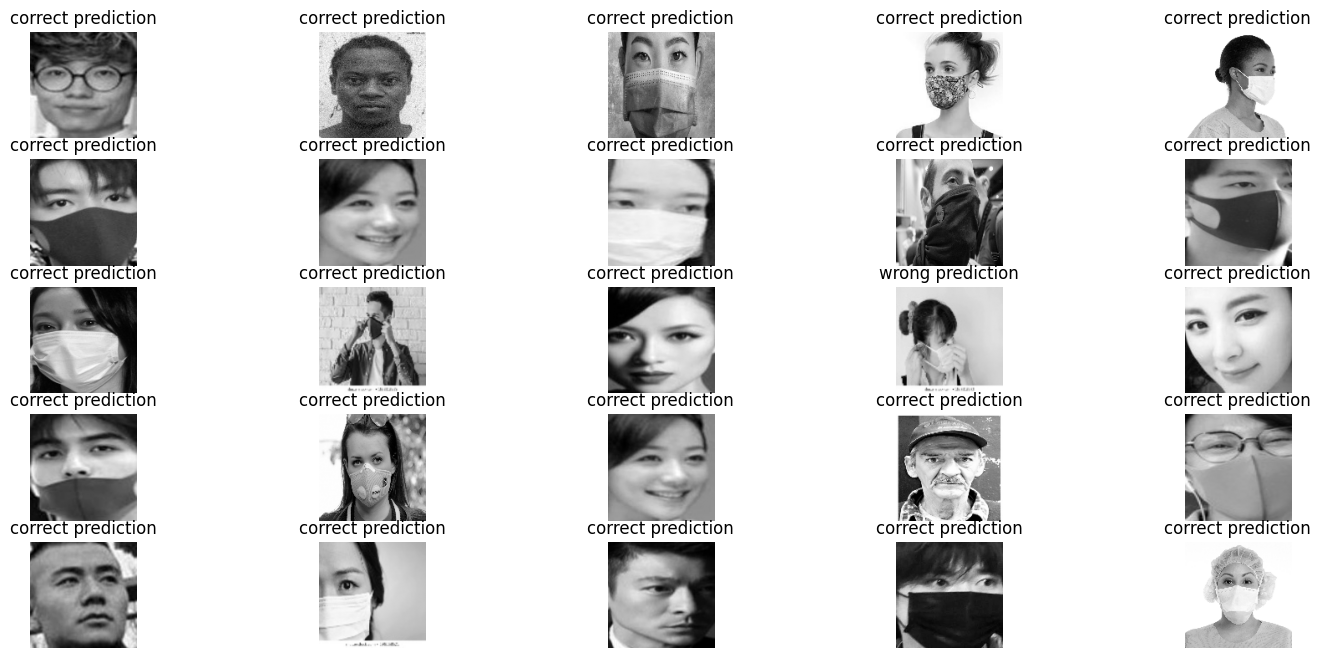

In [52]:
plot_(X_test,y_pred_nn,y_test)

In [ ]:
torch.save(nnet.state_dict(),"/home/aditya/VR_MiniProject/model/NueralNetwork")

## CNN

In [56]:
X_train_resized = []
for i,img in enumerate(X_train):
    X_train_resized.append(cv2.resize(img,dsize=(128,128)))

In [57]:
X_test_resized = []
for i,img in enumerate(X_test):
    X_test_resized.append(cv2.resize(img,dsize=(128,128)))

In [58]:
import torch
import torch.nn as nn

class MaskPredictorCNN(nn.Module):

    def __init__(self, input_channels, hidden_units, output_shape,image_shape):
        super().__init__()

        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(hidden_units),  
            nn.LeakyReLU(0.1),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.LeakyReLU(0.1),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(2),
            nn.Dropout(0.3)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * image_shape//4 * image_shape//4, out_features=256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.4),
            nn.Linear(in_features=256, out_features=output_shape)
        )

    def forward(self, x):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x


In [59]:
mpcnn = MaskPredictorCNN(1,32,1,128)

In [80]:
untrained_prediction = mpcnn(torch.rand((6,1,128,128)))

print((torch.rand((6,1,128,128)).shape))

print(untrained_prediction)
print(torch.sigmoid(untrained_prediction))
print(torch.round(torch.sigmoid(untrained_prediction)))

torch.Size([6, 1, 128, 128])
tensor([[8.8859],
        [8.9252],
        [8.8963],
        [8.9091],
        [8.9067],
        [8.9029]], grad_fn=<AddmmBackward0>)
tensor([[0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999]], grad_fn=<SigmoidBackward0>)
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<RoundBackward0>)


In [61]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(lr=0.05,params = mpcnn.parameters())

In [62]:
X_train_tensor = torch.tensor(X_train_resized, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_resized, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

/tmp/ipykernel_40760/2546103480.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  X_train_tensor = torch.tensor(X_train_resized, dtype=torch.float32).unsqueeze(1)
/tmp/ipykernel_40760/2546103480.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
/tmp/ipykernel_40760/2546103480.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [63]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [ ]:
train_dataloader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

In [65]:
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 128, 128]), torch.Size([32]))

In [66]:
print("We have",len(train_dataloader),"batches of size",32,"in train")
print("We have",len(test_dataloader),"batches of size",32,"in test")

We have 103 batches of size 32 in train
We have 26 batches of size 32 in test


In [67]:
from tqdm.auto import tqdm
epochs = 26

for epoch in tqdm(range(epochs)):

    train_loss = 0
    train_acc = 0

    for batch,(X,y) in enumerate(train_dataloader):

        mpcnn.train()
        optimizer.zero_grad()

        y_logits = mpcnn(X)
        y_pred = torch.round(torch.sigmoid(y_logits))

        loss = loss_fn(y_logits.squeeze(),y)
        loss.backward()
        optimizer.step()

        train_acc += accuracy_score(y_pred.detach().numpy(),y)
        train_loss+=loss.item()

    train_loss/= len(train_dataloader)
    train_acc /= len(train_dataloader)

    test_loss,test_acc = 0,0

    if epoch%10==0:
        mpcnn.eval()
        with torch.inference_mode():

            for X,y in test_dataloader:

                y_logits_test = mpcnn(X)
                y_pred_test = torch.round(torch.sigmoid(y_logits_test))
                test_loss += loss_fn(y_logits_test.squeeze(),y).item()
                test_acc += accuracy_score(y_pred_test.detach().numpy(),y)

            test_loss /= len(test_dataloader)
            test_acc /= len(test_dataloader)

        print(f"epoch:{epoch}, Train loss {train_loss}, Test loss {train_loss}")
        print(f"Train_acc {train_acc*100} Test_acc {test_acc*100}\n\n")

  0%|          | 0/26 [00:00<?, ?it/s]

epoch:0, Train loss 0.6868918650937312, Test loss 0.6868918650937312
Train_acc 72.2188511326861 Test_acc 76.75227732793523


epoch:10, Train loss 0.11519249399346344, Test loss 0.11519249399346344
Train_acc 95.6614077669903 Test_acc 89.89752024291498


epoch:20, Train loss 0.11179016116165637, Test loss 0.11179016116165637
Train_acc 96.14684466019418 Test_acc 92.78846153846155




In [72]:
mpcnn.eval()
with torch.inference_mode():

    for X,y in test_dataloader:

        y_logits_test = mpcnn(X)
        y_pred_test = torch.round(torch.sigmoid(y_logits_test))
        test_loss += loss_fn(y_logits_test.squeeze(),y).item()

        test_acc += accuracy_score(y_pred_test.detach().numpy(),y)

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

print(test_acc)

0.9528709341985482


In [73]:
y_pred_cnn = []
y_true = []

mpcnn.eval()
with torch.inference_mode():
    for X, y in test_dataloader:
        y_logits_test = mpcnn(X)
        y_pred_test = torch.round(torch.sigmoid(y_logits_test))
        y_pred_cnn.extend(y_pred_test.detach().numpy())
        y_true.extend(y)

# print("y_pred_cnn shape:", np.array(y_pred_cnn).flatten().shape)
# print("y_test shape:", y_test.shape)
# print("Unique values in y_pred_cnn:", np.unique(y_pred_cnn))

show_evaluations(y_true, y_pred_cnn, "CNN")

CNN
-------------------------------
accuracy score : 0.9157509157509157
confusion_matrix :
 [[352  53]
 [ 16 398]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91       405
         1.0       0.88      0.96      0.92       414

    accuracy                           0.92       819
   macro avg       0.92      0.92      0.92       819
weighted avg       0.92      0.92      0.92       819



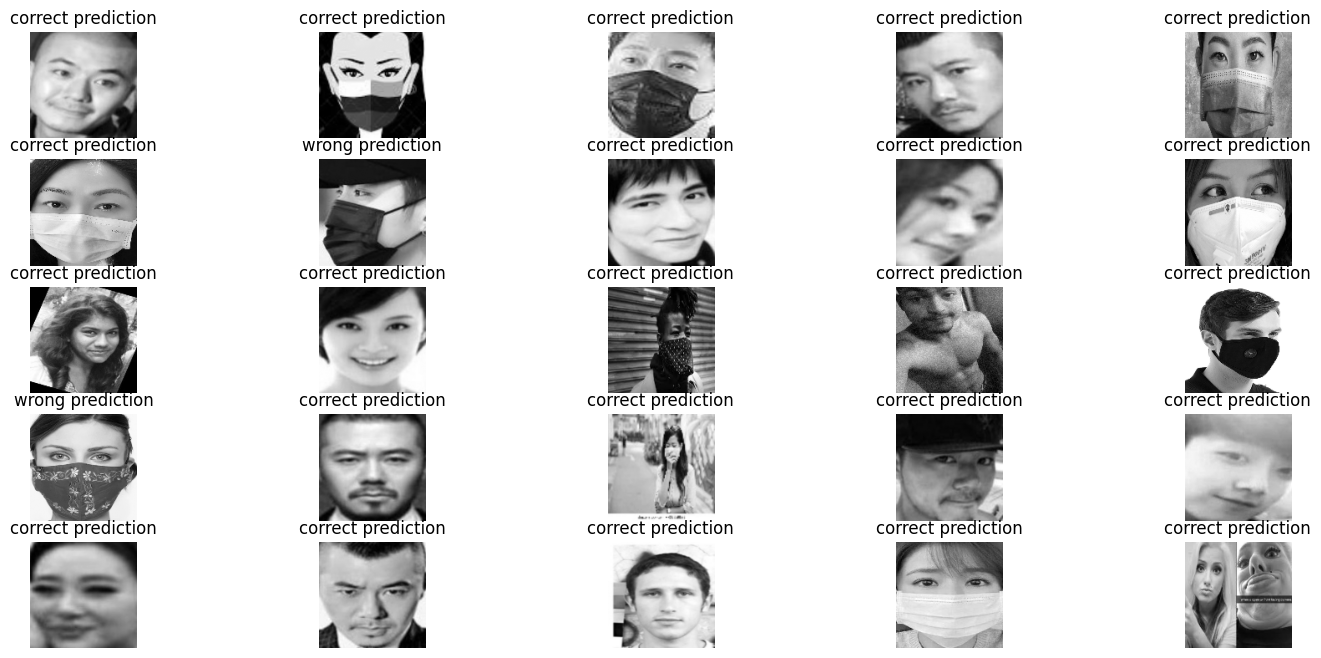

In [214]:
plot_(X_test,y_pred_cnn,y_true)

In [ ]:
torch.save(nnet.state_dict(),"/home/aditya/VR_MiniProject/model/CNN")

## Hyperparameter tuning

In [20]:
import torch.nn as nn

class MaskPredictorCNN_FineTuned(nn.Module):

    def __init__(self,hidden_units, num_hidden_layers, dropout_rate, leaky_relu, image_shape=128, output_shape=1, input_channels =1):
        super().__init__()

        layers = []
        for i in range(num_hidden_layers):
            layers.append(nn.Conv2d(in_channels=input_channels, out_channels=hidden_units, kernel_size=3, stride=1, padding=1))
            layers.append(nn.BatchNorm2d(hidden_units))
            layers.append(nn.LeakyReLU(leaky_relu))
            layers.append(nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1))
            layers.append(nn.BatchNorm2d(hidden_units))
            layers.append(nn.LeakyReLU(leaky_relu))
            layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
            layers.append(nn.Dropout(dropout_rate))

            input_channels = hidden_units  # Update input_channels for the next layer

        # Compute final feature map size after convolution and pooling
        reduced_image_size = image_shape // (2 ** num_hidden_layers)

        layers.append(nn.Flatten())
        layers.append(nn.Linear(in_features=hidden_units * reduced_image_size * reduced_image_size, out_features=256))
        layers.append(nn.BatchNorm1d(256))
        layers.append(nn.LeakyReLU(leaky_relu))
        layers.append(nn.Dropout(dropout_rate))
        layers.append(nn.Linear(in_features=256, out_features=output_shape))

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

In [21]:
import torch
from torch.utils.data import DataLoader,TensorDataset
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

with_mask_folder = os.path.join(os.getcwd(),"../Data/dataset/with_mask")
without_mask_folder = os.path.join(os.getcwd(),"../Data/dataset/without_mask")

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,dsize=(128,128))
        if img is not None:
            images.append(img)
    return images


images_with_mask = load_images_from_folder(with_mask_folder)
images_without_mask = load_images_from_folder(without_mask_folder)

labels_with_mask = np.ones(len(images_with_mask))
labels_without_mask = np.zeros(len(images_without_mask))

X = np.concatenate((images_with_mask,images_without_mask),axis=0)
y = np.concatenate((labels_with_mask,labels_without_mask),axis=0)

X_normalized = [x/255.0 for x in X]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=56)
X_train_resized = []


for i,img in enumerate(X_train):
    X_train_resized.append(cv2.resize(img,dsize=(128,128)))

X_test_resized = []
for i,img in enumerate(X_test):
    X_test_resized.append(cv2.resize(img,dsize=(128,128)))
    

X_train_tensor = torch.tensor(X_train_resized, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_resized, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [24]:
import torch.optim as optim

def objective(trial):

    # next hyperparameter values from the search space
    num_hidden_layers = trial.suggest_int("num_hidden_layers", 1, 5)
    hidden_units = trial.suggest_int("hidden_units", 8, 128, step=8)
    leaky_relu = trial.suggest_float("leaky_relu",0.1,0.3,step=0.1)
    epochs = trial.suggest_int("epochs", 5, 10, step=1)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5, step=0.1)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])
    optimizer_name = trial.suggest_categorical("optimizer", ['Adam', 'SGD', 'RMSprop'])
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-3, log=True)

    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)


    model = MaskPredictorCNN_FineTuned(hidden_units=hidden_units,
                                      num_hidden_layers=num_hidden_layers,
                                      dropout_rate= dropout_rate,
                                      leaky_relu=leaky_relu
                                      )

    # optimizer selection

    loss_fn = nn.BCEWithLogitsLoss()

    if optimizer_name == 'Adam':
      optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    elif optimizer_name == 'SGD':
      optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    else:
      optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # training loop
    for epoch in range(epochs):

        train_loss = 0
        train_acc = 0

        for batch,(X,y) in enumerate(train_dataloader):

            model.train()
            optimizer.zero_grad()

            y_logits = model(X)
            y_pred = torch.round(torch.sigmoid(y_logits))

            loss = loss_fn(y_logits.squeeze(),y)
            loss.backward()
            optimizer.step()

            train_acc += accuracy_score(y_pred.detach().numpy(),y)
            train_loss+=loss.item()

        train_loss/= len(train_dataloader)
        train_acc /= len(train_dataloader)

        test_loss,test_acc = 0,0

        if epoch%10==0:
            model.eval()
            with torch.inference_mode():

                for X,y in test_dataloader:

                    y_logits_test = model(X)
                    y_pred_test = torch.round(torch.sigmoid(y_logits_test))
                    test_loss += loss_fn(y_logits_test.squeeze(),y).item()
                    test_acc += accuracy_score(y_pred_test.detach().numpy(),y)

                test_loss /= len(test_dataloader)
                test_acc /= len(test_dataloader)

            print(f"epoch:{epoch}, Train loss {train_loss}, Test loss {train_loss}")
            print(f"Train_acc {train_acc*100} Test_acc {test_acc*100}\n\n")


In [ ]:
import optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2025-03-18 22:00:23,450] A new study created in memory with name: no-name-d927cb82-5e3e-4e89-b3e3-3ed9f35fb160


epoch:0, Train loss 0.38964837471258296, Test loss 0.38964837471258296
Train_acc 82.5950647249191 Test_acc 90.09994939271255




[W 2025-03-18 22:36:50,170] Trial 0 failed with parameters: {'num_hidden_layers': 1, 'hidden_units': 112, 'leaky_relu': 0.1, 'epochs': 9, 'learning_rate': 2.444082034379937e-05, 'dropout_rate': 0.4, 'batch_size': 32, 'optimizer': 'RMSprop', 'weight_decay': 0.0003835367166933258} because of the following error: The value None could not be cast to float..
[W 2025-03-18 22:36:50,170] Trial 0 failed with value None.


epoch:0, Train loss 0.4390678841334123, Test loss 0.4390678841334123
Train_acc 79.7676282051282 Test_acc 82.65460030165913




[W 2025-03-18 22:59:53,239] Trial 1 failed with parameters: {'num_hidden_layers': 4, 'hidden_units': 96, 'leaky_relu': 0.2, 'epochs': 7, 'learning_rate': 5.803848039147419e-05, 'dropout_rate': 0.1, 'batch_size': 64, 'optimizer': 'Adam', 'weight_decay': 1.4581089098533184e-05} because of the following error: The value None could not be cast to float..
[W 2025-03-18 22:59:53,240] Trial 1 failed with value None.


epoch:0, Train loss 0.7139151014932772, Test loss 0.7139151014932772
Train_acc 52.30691056910569 Test_acc 44.75160256410256


